In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



- 	Dataset: We define a simple dataset with house size, number of bedrooms, and the target value (house price).
-	Model 1: The first model predicts the mean of house prices for all data points.
-	Residuals Calculation: After Model 1, we calculate residuals (actual - predicted).
-	Model 2: We fit a decision tree on the residuals, predicting the correction to the initial mean predictions.
-	Model 3: We fit another decision tree on the residuals from Model 2, further improving the predictions.
-	Plotting: We visualize the decision trees for Model 2 and Model 3.



# Step 1: Define the dataset


In [ ]:

data = {
    'HouseSize': [1200, 1500, 1800, 2000, 2200],
    'NumberOfBedrooms': [3, 4, 3, 4, 5],
    'HousePrice': [250000, 300000, 350000, 400000, 450000]
}

df = pd.DataFrame(data)

# initial prediction
## Step 2: Initialize Model 1 - Compute Mean Prediction

In [ ]:



y = df['HousePrice']
y_mean = np.mean(y)
df['Model1_Prediction'] = y_mean

In [ ]:
df

,HouseSize,NumberOfBedrooms,HousePrice,Model1_Prediction
0,1200,3,250000,350000.0
1,1500,4,300000,350000.0
2,1800,3,350000,350000.0
3,2000,4,400000,350000.0
4,2200,5,450000,350000.0


# Step 3: Calculate Residuals for Model 1

In [ ]:

df['Residual_Model1'] = df['HousePrice'] - df['Model1_Prediction']


In [ ]:
df

,HouseSize,NumberOfBedrooms,HousePrice,Model1_Prediction,Residual_Model1
0,1200,3,250000,350000.0,-100000.0
1,1500,4,300000,350000.0,-50000.0
2,1800,3,350000,350000.0,0.0
3,2000,4,400000,350000.0,50000.0
4,2200,5,450000,350000.0,100000.0


# Step 4: Fit Model 2 - Decision Tree on Residuals


In [ ]:
X = df[['HouseSize', 'NumberOfBedrooms']]  # Features

In [ ]:
# Create the model and fit it on the residuals
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X, df['Residual_Model1'])

DecisionTreeRegressor(random_state=42)

Text(0.5, 1.0, 'Decision Tree - Model 2')

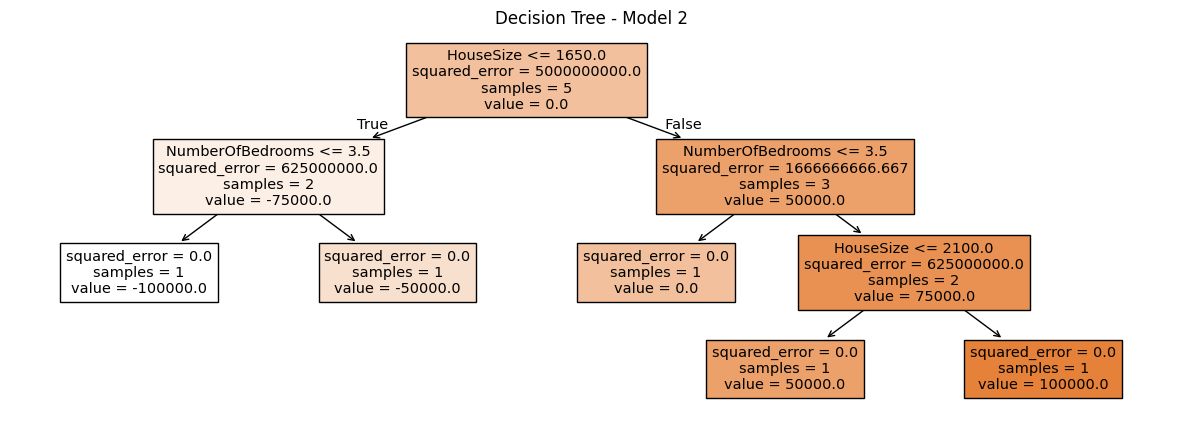

In [ ]:
# Plotting Decision Trees
fig = plt.subplots( figsize=(15, 5))
plot_tree(model2, filled=True, feature_names=['HouseSize', 'NumberOfBedrooms'])
plt.title('Decision Tree - Model 2')

# Step 5: Predictions from Model 2


In [ ]:
df['Model2_Prediction'] = model2.predict(X)

In [ ]:
df

,HouseSize,NumberOfBedrooms,HousePrice,Model1_Prediction,Residual_Model1,Model2_Prediction
0,1200,3,250000,350000.0,-100000.0,-100000.0
1,1500,4,300000,350000.0,-50000.0,-50000.0
2,1800,3,350000,350000.0,0.0,0.0
3,2000,4,400000,350000.0,50000.0,50000.0
4,2200,5,450000,350000.0,100000.0,100000.0


In [ ]:
df['Updated_Prediction_Model2'] = df['Model1_Prediction'] +  df['Model2_Prediction']


In [ ]:
df

,HouseSize,NumberOfBedrooms,HousePrice,Model1_Prediction,Residual_Model1,Model2_Prediction,Updated_Prediction_Model2
0,1200,3,250000,350000.0,-100000.0,-100000.0,250000.0
1,1500,4,300000,350000.0,-50000.0,-50000.0,300000.0
2,1800,3,350000,350000.0,0.0,0.0,350000.0
3,2000,4,400000,350000.0,50000.0,50000.0,400000.0
4,2200,5,450000,350000.0,100000.0,100000.0,450000.0


# Step 6: Calculate Residuals for Model 2

In [ ]:

df['Residual_Model2_overfit'] = df['HousePrice'] - df['Updated_Prediction_Model2']

In [ ]:
df

,HouseSize,NumberOfBedrooms,HousePrice,Model1_Prediction,Residual_Model1,Model2_Prediction,Updated_Prediction_Model2,Residual_Model2_overfit
0,1200,3,250000,350000.0,-100000.0,-100000.0,250000.0,0.0
1,1500,4,300000,350000.0,-50000.0,-50000.0,300000.0,0.0
2,1800,3,350000,350000.0,0.0,0.0,350000.0,0.0
3,2000,4,400000,350000.0,50000.0,50000.0,400000.0,0.0
4,2200,5,450000,350000.0,100000.0,100000.0,450000.0,0.0


- as can be seen in the above table:
 - model 2 predictions exactly match actual values which show its a case of overfitting and also the residuals are 0

## **to avoid overfitting we use learning rate while calculating residuals**

In [ ]:
learningRate = 0.1
df['Updated_Prediction_Model2'] = df['Model1_Prediction'] +  (learningRate* df['Model2_Prediction'])

df['Residual_Model2'] = df['HousePrice'] -(df['Updated_Prediction_Model2'])

In [ ]:
df

,HouseSize,NumberOfBedrooms,HousePrice,Model1_Prediction,Residual_Model1,Model2_Prediction,Updated_Prediction_Model2,Residual_Model2_overfit,Residual_Model2
0,1200,3,250000,350000.0,-100000.0,-100000.0,340000.0,0.0,-90000.0
1,1500,4,300000,350000.0,-50000.0,-50000.0,345000.0,0.0,-45000.0
2,1800,3,350000,350000.0,0.0,0.0,350000.0,0.0,0.0
3,2000,4,400000,350000.0,50000.0,50000.0,355000.0,0.0,45000.0
4,2200,5,450000,350000.0,100000.0,100000.0,360000.0,0.0,90000.0


In [ ]:
# Step 7: Fit Model 3 - Decision Tree on Residuals from Model 2
model3 = DecisionTreeRegressor(random_state=42)
model3.fit(X, df['Residual_Model2'])

DecisionTreeRegressor(random_state=42)

In [ ]:
# Step 8: Predictions from Model 3
df['Model3_Prediction'] = model3.predict(X)

In [ ]:
df

,HouseSize,NumberOfBedrooms,HousePrice,Model1_Prediction,Residual_Model1,Model2_Prediction,Updated_Prediction_Model2,Residual_Model2_overfit,Residual_Model2,Model3_Prediction
0,1200,3,250000,350000.0,-100000.0,-100000.0,340000.0,0.0,-90000.0,-90000.0
1,1500,4,300000,350000.0,-50000.0,-50000.0,345000.0,0.0,-45000.0,-45000.0
2,1800,3,350000,350000.0,0.0,0.0,350000.0,0.0,0.0,0.0
3,2000,4,400000,350000.0,50000.0,50000.0,355000.0,0.0,45000.0,45000.0
4,2200,5,450000,350000.0,100000.0,100000.0,360000.0,0.0,90000.0,90000.0


In [ ]:
df['Final_Prediction'] = df['Model1_Prediction'] +  (learningRate* df['Model2_Prediction']) +(learningRate* df['Model3_Prediction'])


In [ ]:
df

,HouseSize,NumberOfBedrooms,HousePrice,Model1_Prediction,Residual_Model1,Model2_Prediction,Updated_Prediction_Model2,Residual_Model2_overfit,Residual_Model2,Model3_Prediction,Final_Prediction
0,1200,3,250000,350000.0,-100000.0,-100000.0,340000.0,0.0,-90000.0,-90000.0,331000.0
1,1500,4,300000,350000.0,-50000.0,-50000.0,345000.0,0.0,-45000.0,-45000.0,340500.0
2,1800,3,350000,350000.0,0.0,0.0,350000.0,0.0,0.0,0.0,350000.0
3,2000,4,400000,350000.0,50000.0,50000.0,355000.0,0.0,45000.0,45000.0,359500.0
4,2200,5,450000,350000.0,100000.0,100000.0,360000.0,0.0,90000.0,90000.0,369000.0


Text(0.5, 1.0, 'Decision Tree - Model 3')

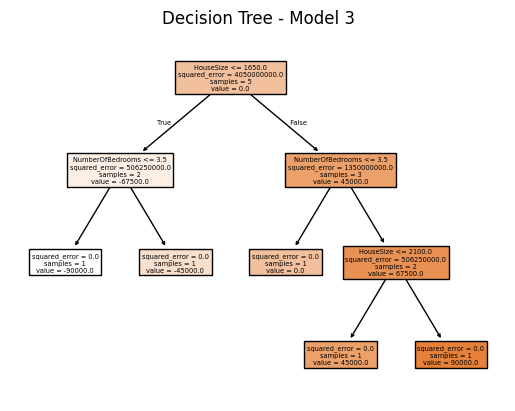

In [ ]:
plot_tree(model3, filled=True, feature_names=['HouseSize', 'NumberOfBedrooms'])
plt.title('Decision Tree - Model 3')